# Gender Classification from Images Using Convolutional Neural Network 

## Install Required Libraries

In [1]:
!pip install opendatasets visualkeras -q

     |████████████████████████████████| 989 kB 11.9 MB/s 


## Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
import os
import opendatasets as od
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from torch.utils.data.dataloader import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
import visualkeras
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [2]:
from keras.models import load_model

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

## Download The Datasets

In [3]:
od.download('https://www.kaggle.com/datasets/ashishjangra27/gender-recognition-200k-images-celeba')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omjiverma
Your Kaggle Key: ··········


100%|██████████| 1.32G/1.32G [00:12<00:00, 110MB/s]


### Check some images from dataset

In [4]:
path='./gender-recognition-200k-images-celeba/Dataset'

In [5]:
dataset = ImageFolder(path+'/Train', transform=ToTensor())
batch_size=112
dl = DataLoader(dataset, batch_size, shuffle=True, num_workers=4, pin_memory=True)
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

## Check Shape of Images

In [6]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 218, 178]) 0


tensor([[[0.9922, 0.9922, 0.9922,  ..., 0.9686, 0.9961, 0.9961],
         [0.9922, 0.9922, 0.9922,  ..., 0.9765, 0.9961, 0.9961],
         [0.9922, 0.9922, 0.9922,  ..., 0.9804, 1.0000, 1.0000],
         ...,
         [0.5490, 0.4549, 0.5725,  ..., 0.4784, 0.4784, 0.4784],
         [0.5098, 0.5412, 0.6510,  ..., 0.4627, 0.4627, 0.4627],
         [0.6588, 0.8000, 0.9608,  ..., 0.4627, 0.4706, 0.4706]],

        [[0.9059, 0.9059, 0.9059,  ..., 0.8863, 0.9333, 0.9333],
         [0.9059, 0.9059, 0.9059,  ..., 0.8941, 0.9333, 0.9333],
         [0.9059, 0.9059, 0.9059,  ..., 0.9059, 0.9373, 0.9373],
         ...,
         [0.2902, 0.1882, 0.3059,  ..., 0.2157, 0.2196, 0.2196],
         [0.2431, 0.2745, 0.3843,  ..., 0.1922, 0.2000, 0.2000],
         [0.3922, 0.5333, 0.6941,  ..., 0.1922, 0.1961, 0.1961]],

        [[0.7608, 0.7608, 0.7608,  ..., 0.8824, 0.8706, 0.8706],
         [0.7608, 0.7608, 0.7608,  ..., 0.8824, 0.8706, 0.8706],
         [0.7608, 0.7608, 0.7608,  ..., 0.8902, 0.8745, 0.

In [7]:
img, label = dataset[867]
print(img.shape, label)
img

torch.Size([3, 218, 178]) 0


tensor([[[0.8902, 0.8824, 0.8667,  ..., 0.5333, 0.5216, 0.5216],
         [0.8902, 0.8824, 0.8667,  ..., 0.5333, 0.5216, 0.5216],
         [0.8941, 0.8863, 0.8706,  ..., 0.5333, 0.5216, 0.5216],
         ...,
         [0.4784, 0.4902, 0.4902,  ..., 0.4745, 0.7490, 0.8863],
         [0.4392, 0.4588, 0.4588,  ..., 0.4784, 0.6863, 0.7608],
         [0.4471, 0.4706, 0.4784,  ..., 0.4784, 0.6510, 0.7255]],

        [[0.8941, 0.8863, 0.8706,  ..., 0.4627, 0.4588, 0.4588],
         [0.8941, 0.8863, 0.8706,  ..., 0.4627, 0.4588, 0.4588],
         [0.8980, 0.8902, 0.8745,  ..., 0.4627, 0.4588, 0.4588],
         ...,
         [0.3843, 0.3961, 0.3843,  ..., 0.3608, 0.6745, 0.8118],
         [0.3451, 0.3569, 0.3451,  ..., 0.3647, 0.6157, 0.6902],
         [0.3490, 0.3647, 0.3569,  ..., 0.3686, 0.5765, 0.6510]],

        [[0.9137, 0.9059, 0.8902,  ..., 0.6196, 0.6118, 0.6118],
         [0.9137, 0.9059, 0.8902,  ..., 0.6196, 0.6118, 0.6118],
         [0.9176, 0.9098, 0.8941,  ..., 0.6196, 0.6118, 0.

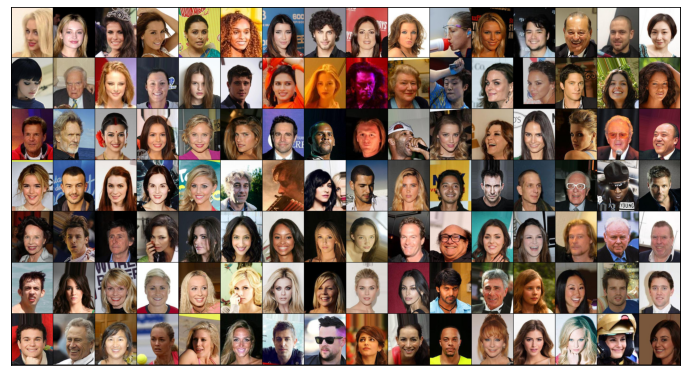

In [8]:
show_batch(dl)

## Check images in each directory

In [9]:
print('Num of images in Train Male :',len(os.listdir(path+'/Train/Male')))
print('Num of images in Train Female :',len(os.listdir(path+'/Train/Female')))
print('Num of images in Val Male :',len(os.listdir(path+'/Validation/Male')))
print('Num of images in Val Female :',len(os.listdir(path+'/Validation/Female')))
print('Num of images in Test Male :',len(os.listdir(path+'/Test/Male')))
print('Num of images in Test Female :',len(os.listdir(path+'/Test/Female')))

Num of images in Train Male : 67155
Num of images in Train Female : 92845
Num of images in Val Male : 8820
Num of images in Val Female : 13778
Num of images in Test Male : 8459
Num of images in Test Female : 11542


## Data Preprocessing

In [10]:
datagen = ImageDataGenerator(rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = datagen.flow_from_directory(path+'/Train/',
                                                    batch_size =256 ,
                                                    class_mode = 'binary', 
                                                    target_size = (64, 64))  
validation_generator =  datagen.flow_from_directory( path+'/Validation/',
                                                          batch_size  = 256,
                                                          class_mode  = 'binary', 
                                                          target_size = (64, 64))
test_datagen = ImageDataGenerator( rescale = 1.0/255)

test_generator = test_datagen.flow_from_directory( path+'/Test/',
                                                          batch_size  = 256,
                                                          class_mode  = 'binary', 
                                                          target_size = (64, 64),shuffle=False)

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.
Found 20001 images belonging to 2 classes.


## Building Convolutional Neural Network

In [11]:
#Initialising NN
model = Sequential()
# 1st Convolution
model.add(Conv2D(96, kernel_size=(11,11),strides=(4,4), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2, strides=(2,2)))
# 2nd Convolution
model.add(Conv2D(256, kernel_size=(11,11),strides=(1,1), activation='relu',padding="same"))
model.add(BatchNormalization())
# 3rd Convolution
model.add(Conv2D(384, kernel_size=(3,3),strides=(1,1), activation='relu',padding="same"))
model.add(BatchNormalization())
# 4th Convolution
model.add(Conv2D(384, kernel_size=(3,3),strides=(1,1), activation='relu',padding="same"))
model.add(BatchNormalization())
# 5th Convolution
model.add(Conv2D(256, kernel_size=(3,3),strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, strides=(2,2)))
# Flatten Layer
model.add(Flatten())

# To FC layer 1
model.add(Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
# To FC layer 2
model.add(Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [12]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [13]:
model.compile(optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'])

## Visualise our Convolutional NN

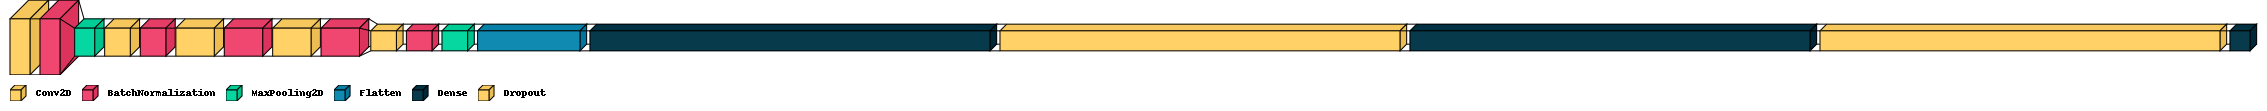

In [14]:
visualkeras.layered_view(model, legend=True)

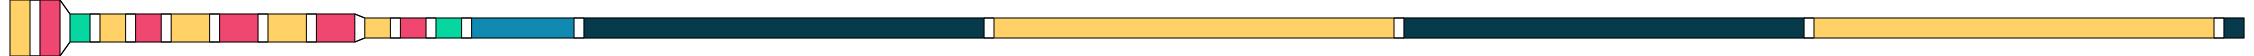

In [15]:
visualkeras.layered_view(model, draw_volume=False)

## Train Our Conv NN

In [ ]:
with tf.device(tf.DeviceSpec(device_type="GPU", device_index=1)):
  hist = model.fit_generator(generator=train_generator,
                      validation_data=validation_generator,
                      epochs=20,workers=4)

Epoch 1/20
625/625 [==============================] - 336s 535ms/step - loss: 0.5344 - accuracy: 0.7329 - val_loss: 0.6847 - val_accuracy: 0.5985
Epoch 2/20
625/625 [==============================] - 321s 510ms/step - loss: 0.4485 - accuracy: 0.7876 - val_loss: 0.4271 - val_accuracy: 0.7991
Epoch 3/20
625/625 [==============================] - 317s 504ms/step - loss: 0.3875 - accuracy: 0.8224 - val_loss: 0.3547 - val_accuracy: 0.8417
Epoch 4/20
625/625 [==============================] - 316s 504ms/step - loss: 0.3406 - accuracy: 0.8478 - val_loss: 0.4027 - val_accuracy: 0.8102
Epoch 5/20
625/625 [==============================] - 316s 503ms/step - loss: 0.3050 - accuracy: 0.8654 - val_loss: 0.4654 - val_accuracy: 0.7914
Epoch 6/20
625/625 [==============================] - 315s 502ms/step - loss: 0.2872 - accuracy: 0.8750 - val_loss: 0.5232 - val_accuracy: 0.7390
Epoch 7/20
625/625 [==============================] - 315s 502ms/step - loss: 0.2719 - accuracy: 0.8827 - val_loss: 0.8362 -

## Save Model

In [15]:
 model.save('gender_clf.h5')

## Load Model

In [16]:
savedModel = load_model('gender_clf.h5') 

## Model Evaluation

In [17]:
y=savedModel.predict(test_generator)
y_preds = np.array([1 * (x[0]>=0.5) for x in y])
y_true=test_generator.classes

In [18]:
clf_report = pd.DataFrame(classification_report(y_true, y_preds, output_dict=True))
print("Test Result:\n================================================")        
print(f"Accuracy Score: {accuracy_score(y_true, y_preds) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_true, y_preds)}\n")

Test Result:
Accuracy Score: 92.06%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.983392     0.853993  0.920604      0.918692      0.928665
recall         0.877231     0.979785  0.920604      0.928508      0.920604
f1-score       0.927283     0.912574  0.920604      0.919929      0.921062
support    11542.000000  8459.000000  0.920604  20001.000000  20001.000000
_______________________________________________
Confusion Matrix: 
 [[10125  1417]
 [  171  8288]]



## Prediction with single image

In [19]:
!pip install gradio -q

In [20]:
import gradio as gr
from keras.preprocessing import image

In [21]:
def pred_gender(img):
  savedModel = load_model('./gender_clf.h5') 
  test_image = image.img_to_array(img)
  test_image = np.expand_dims(test_image, axis = 0)
  result = savedModel.predict(test_image)
  if result[0][0] >= 0.5:
    prediction = 'Male'
  else:
    prediction = 'Female'

  return prediction

In [22]:
gui = gr.Interface(pred_gender, gr.Image(shape=(64, 64)), outputs="text",title='Gender Indentification from Image')

gui.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://33931.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f7f68c5a5d0>,
 'http://127.0.0.1:7860/',
 'https://33931.gradio.app')

## Conclusion

I trained the model only for 20 epoch. It can achieve a greater accuracy if we train it for some more time 30-40 epoch